In [1]:
# titanin logestic Regrassion practice project.

# import neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
import statsmodels.api as sm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_original = pd.read_csv('train.csv')
df = df_original.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

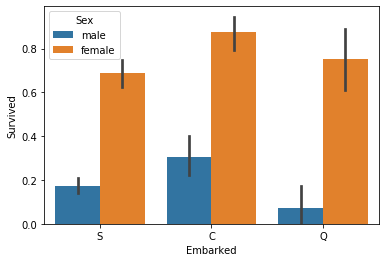

In [5]:
sns.barplot(x='Embarked' , y ='Survived',data = df,hue='Sex')

In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

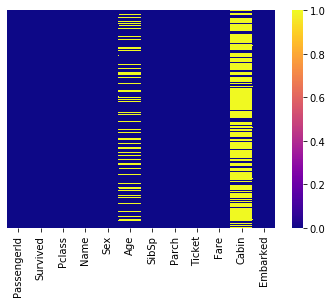

In [7]:
# checkl null value by heatmap
#cmap 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
#cmaps['Sequential'] = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            #'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            #'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
#plasma is best k        
import seaborn as sns
sns.heatmap(df.isna(),yticklabels= False,cmap = 'plasma')

In [8]:
#
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins=(-1,0,5,12,18,25,35,60,120)
    group_name=['unknown','Baby','child','Teenagar','Studen','Young_adult','Adult','Senior']
    categories =pd.cut(df.Age,bins,labels =group_name)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x :x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1,0,8,15,31,1000)
    group_name_fare = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare , bins ,labels=group_name_fare)
    df.Fare = categories
    return df
    
def format_name(df):
    df['Lname'] = df.Name.apply(lambda x : x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x : x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Ticket','Name','Embarked'],axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df
    




In [9]:
df_train = transform_features(df)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Studen,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young_adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young_adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young_adult,0,0,2_quartile,N,"Allen,",Mr.
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,Young_adult,0,0,2_quartile,N,"Montvila,",Rev.
887,888,1,1,female,Studen,0,0,3_quartile,B,"Graham,",Miss.
888,889,0,3,female,unknown,1,2,3_quartile,N,"Johnston,",Miss.
889,890,1,1,male,Young_adult,0,0,3_quartile,C,"Behr,",Mr.


In [10]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,male,Studen,1,0,1_quartile,N,"Braund,",Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,"Cumings,",Mrs.
2,3,1,3,female,Young_adult,0,0,1_quartile,N,"Heikkinen,",Miss.
3,4,1,1,female,Young_adult,1,0,4_quartile,C,"Futrelle,",Mrs.
4,5,0,3,male,Young_adult,0,0,2_quartile,N,"Allen,",Mr.
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,Young_adult,0,0,2_quartile,N,"Montvila,",Rev.
887,888,1,1,female,Studen,0,0,3_quartile,B,"Graham,",Miss.
888,889,0,3,female,unknown,1,2,3_quartile,N,"Johnston,",Miss.
889,890,1,1,male,Young_adult,0,0,3_quartile,C,"Behr,",Mr.


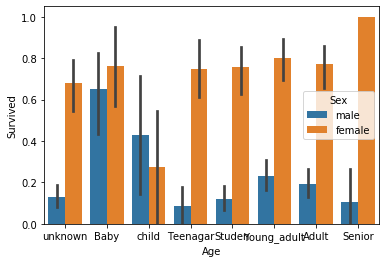

In [11]:
sns.barplot(x='Age',y='Survived',hue='Sex',data=df)

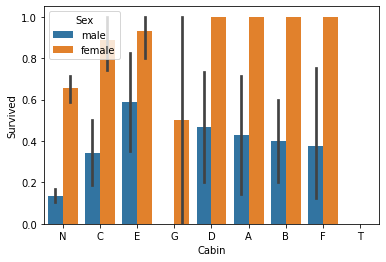

In [12]:
sns.barplot(x='Cabin',y='Survived',hue='Sex',data=df)

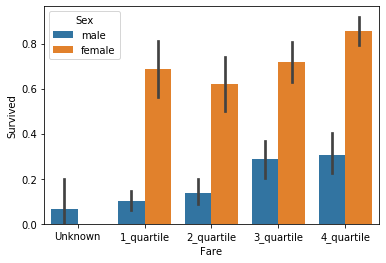

In [13]:



sns.barplot(x='Fare',y='Survived',hue='Sex',data=df)

In [14]:
from sklearn import preprocessing

def encode_features(df_train):
    features =['Fare','Cabin','Age','Sex','Lname','NamePrefix']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le =le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train
    
    
    

In [15]:
df_train = encode_features(df_train)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,1,0,3,1,3,1,0,0,7,73,17
1,2,1,1,0,0,1,0,3,2,136,18
2,3,1,3,0,5,0,0,0,7,251,14
3,4,1,1,0,5,1,0,3,2,198,18
4,5,0,3,1,5,0,0,1,7,11,17
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,5,0,0,1,7,406,23
887,888,1,1,0,3,0,0,2,1,221,14
888,889,0,3,0,7,1,2,2,7,293,14
889,890,1,1,1,5,0,0,2,2,52,17


In [16]:
# check unique value in age 

df_train.Age.value_counts()
df.Age.value_counts()
df.Age.unique

<bound method Series.unique of 0           Studen
1            Adult
2      Young_adult
3      Young_adult
4      Young_adult
          ...     
886    Young_adult
887         Studen
888        unknown
889    Young_adult
890    Young_adult
Name: Age, Length: 891, dtype: category
Categories (8, object): [unknown < Baby < child < Teenagar < Studen < Young_adult < Adult < Senior]>

In [17]:
# spliting data train and test

X_all =df_train.drop(['Survived','PassengerId'],axis =1)
y_all = df_train['Survived']
X_train,X_test,y_train,y_test = train_test_split(X_all,y_all,test_size =.3,random_state =23)

In [18]:
y_all

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
print(X_train.shape,X_test.shape)

(623, 9) (268, 9)


In [20]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression(C=0.01,penalty='l2')
model_log = logreg.fit(X_train,y_train)
logreg.score(X_train,y_train)

0.709470304975923

In [22]:
#we can iterate through values c to find optimal parameter
best_c =0
best_score =0
for c in np.arange(.001,1,.001):
    lr =LogisticRegression(C=c)
    lr =lr.fit(X_train,y_train)
    if lr.score(X_train,y_train) > best_score:
        best_c =c
        best_score = lr.score(X_train,y_train)
        
print(best_c)
print(best_score)


0.915
0.8073836276083467


In [23]:
# or we can use grid-search

penalty =['l1','l2']

C =np.arange(.1,100,.5)
print(C)

para = dict(C =C ,penalty =penalty)
para

[ 0.1  0.6  1.1  1.6  2.1  2.6  3.1  3.6  4.1  4.6  5.1  5.6  6.1  6.6
  7.1  7.6  8.1  8.6  9.1  9.6 10.1 10.6 11.1 11.6 12.1 12.6 13.1 13.6
 14.1 14.6 15.1 15.6 16.1 16.6 17.1 17.6 18.1 18.6 19.1 19.6 20.1 20.6
 21.1 21.6 22.1 22.6 23.1 23.6 24.1 24.6 25.1 25.6 26.1 26.6 27.1 27.6
 28.1 28.6 29.1 29.6 30.1 30.6 31.1 31.6 32.1 32.6 33.1 33.6 34.1 34.6
 35.1 35.6 36.1 36.6 37.1 37.6 38.1 38.6 39.1 39.6 40.1 40.6 41.1 41.6
 42.1 42.6 43.1 43.6 44.1 44.6 45.1 45.6 46.1 46.6 47.1 47.6 48.1 48.6
 49.1 49.6 50.1 50.6 51.1 51.6 52.1 52.6 53.1 53.6 54.1 54.6 55.1 55.6
 56.1 56.6 57.1 57.6 58.1 58.6 59.1 59.6 60.1 60.6 61.1 61.6 62.1 62.6
 63.1 63.6 64.1 64.6 65.1 65.6 66.1 66.6 67.1 67.6 68.1 68.6 69.1 69.6
 70.1 70.6 71.1 71.6 72.1 72.6 73.1 73.6 74.1 74.6 75.1 75.6 76.1 76.6
 77.1 77.6 78.1 78.6 79.1 79.6 80.1 80.6 81.1 81.6 82.1 82.6 83.1 83.6
 84.1 84.6 85.1 85.6 86.1 86.6 87.1 87.6 88.1 88.6 89.1 89.6 90.1 90.6
 91.1 91.6 92.1 92.6 93.1 93.6 94.1 94.6 95.1 95.6 96.1 96.6 97.1 97.6
 98.1 

{'C': array([ 0.1,  0.6,  1.1,  1.6,  2.1,  2.6,  3.1,  3.6,  4.1,  4.6,  5.1,
         5.6,  6.1,  6.6,  7.1,  7.6,  8.1,  8.6,  9.1,  9.6, 10.1, 10.6,
        11.1, 11.6, 12.1, 12.6, 13.1, 13.6, 14.1, 14.6, 15.1, 15.6, 16.1,
        16.6, 17.1, 17.6, 18.1, 18.6, 19.1, 19.6, 20.1, 20.6, 21.1, 21.6,
        22.1, 22.6, 23.1, 23.6, 24.1, 24.6, 25.1, 25.6, 26.1, 26.6, 27.1,
        27.6, 28.1, 28.6, 29.1, 29.6, 30.1, 30.6, 31.1, 31.6, 32.1, 32.6,
        33.1, 33.6, 34.1, 34.6, 35.1, 35.6, 36.1, 36.6, 37.1, 37.6, 38.1,
        38.6, 39.1, 39.6, 40.1, 40.6, 41.1, 41.6, 42.1, 42.6, 43.1, 43.6,
        44.1, 44.6, 45.1, 45.6, 46.1, 46.6, 47.1, 47.6, 48.1, 48.6, 49.1,
        49.6, 50.1, 50.6, 51.1, 51.6, 52.1, 52.6, 53.1, 53.6, 54.1, 54.6,
        55.1, 55.6, 56.1, 56.6, 57.1, 57.6, 58.1, 58.6, 59.1, 59.6, 60.1,
        60.6, 61.1, 61.6, 62.1, 62.6, 63.1, 63.6, 64.1, 64.6, 65.1, 65.6,
        66.1, 66.6, 67.1, 67.6, 68.1, 68.6, 69.1, 69.6, 70.1, 70.6, 71.1,
        71.6, 72.1, 72.6, 73.1, 7

In [24]:
lg = LogisticRegression()
clf = GridSearchCV(lr,para,cv=5,verbose=0)
grid = clf.fit(X_train,y_train)



In [25]:
print(grid.best_estimator_.get_params()['penalty'])
print(grid.best_estimator_.get_params()['C'])

l1
5.1


In [26]:
#modeling with best parameter fron grid search
lg =LogisticRegression(C=5.1,penalty='l1')
lg.fit(X_train,y_train)
lg.score(X_train,y_train)

0.8186195826645265

In [27]:
lg.coef_

array([[-7.03866573e-01, -2.80261330e+00,  5.52154641e-02,
        -3.81243751e-01, -1.98611506e-01,  5.82149540e-02,
        -1.11816053e-01, -5.72474971e-04, -1.11914262e-01]])

In [71]:
#display pred prob
lg.predict_proba(X_train)

array([[0.149151  , 0.850849  ],
       [0.91810596, 0.08189404],
       [0.31849586, 0.68150414],
       ...,
       [0.43978068, 0.56021932],
       [0.1213005 , 0.8786995 ],
       [0.87304544, 0.12695456]])

In [70]:
y_pred = lg.predict(X_train)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.8186195826645265

In [73]:
y_test_pred = lg.predict(X_test)

In [74]:
#check accuracy for test data 
accuracy_score(y_test,y_test_pred)

0.7649253731343284

In [75]:
#importin test data and cleaning

df_test =pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
df_test_trans =transform_features(df_test)
df_test_trans

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
0,892,3,male,Young_adult,0,0,1_quartile,N,"Kelly,",Mr.
1,893,3,female,Adult,1,0,1_quartile,N,"Wilkes,",Mrs.
2,894,2,male,Senior,0,0,2_quartile,N,"Myles,",Mr.
3,895,3,male,Young_adult,0,0,2_quartile,N,"Wirz,",Mr.
4,896,3,female,Studen,1,1,2_quartile,N,"Hirvonen,",Mrs.
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,unknown,0,0,2_quartile,N,"Spector,",Mr.
414,1306,1,female,Adult,0,0,4_quartile,C,Oliva,y
415,1307,3,male,Adult,0,0,1_quartile,N,"Saether,",Mr.
416,1308,3,male,unknown,0,0,2_quartile,N,"Ware,",Mr.


In [77]:
# check from stats

import statsmodels.api as sm
logic_model = sm.Logit(y_train,X_train)
res = logic_model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.476177
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 Jan 2020   Pseudo R-squ.:                  0.2909
Time:                        00:17:59   Log-Likelihood:                -296.66
converged:                       True   LL-Null:                       -418.38
Covariance Type:            nonrobust   LLR p-value:                 4.232e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.1552      0.198     -0.782      0.434      -0.544       0.234
Sex           -2.7194      0.235    -11.558      0.000      -3.181      -2.258
Age            0.0631      0.043      1.451      0.147      -0.022       0.148
SibSp         -0.4174      0.127     -3.287      0.001      -0.666      -0.168
Parch         -0.2745      0.139     -1.981      0.048      -0.546      -0.003
Fare           0.4717      0.124      3.810      0.000       0.229       0.714
Cabin         -0.0661      0.073     -0.911      0.362      -0.208       0.076
Lname          0.0002      0.001      0.436      0.663      -0.001       0.001
NamePrefix     0.0707      0.031      2.313      0.021       0.011       0.131
==============================================================================
"""

In [29]:
y_eq= 0.80721 *(-1) + 50*(0.03156)
y_eq

0.7707899999999999

In [37]:
np.exp(-5)

0.006737946999085467

In [38]:
1 / (1+np.exp(-5))

0.9933071490757153

In [34]:
50 * 0.0315

1.575

In [40]:
pip install xgboost 

     |████████████████████████████████| 686kB 3.3MB/s eta 0:00:01
  Created wheel for xgboost: filename=xgboost-0.90-cp37-cp37m-macosx_10_9_x86_64.whl size=1710238 sha256=81370b23333290e78bfc5df106c8c90878a5a485484dd09ee33145999c91272e
  Stored in directory: /Users/mukeshchaudhary/Library/Caches/pip/wheels/e9/48/4d/de4187b5270dff71d3697c5a7857a1e2d9a0c63a28b3462eeb
Successfully built xgboost
Note: you may need to restart the kernel to use updated packages.
